In [3]:
import numpy as np 
import pandas as pd 


In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import re
import sklearn
try:
    from sklearn.feature_selection import VarianceThreshold
except AttributeError:
    pass 

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [12]:
df1 = pd.read_csv('labs.csv')
df2 = pd.read_csv('examination.csv')
df3 = pd.read_csv('demographic.csv')
df4 = pd.read_csv('diet.csv')
df5 = pd.read_csv('questionnaire.csv')

df2.drop(['SEQN'], axis = 1, inplace=True)
df3.drop(['SEQN'], axis = 1, inplace=True)
df4.drop(['SEQN'], axis = 1, inplace=True)
df5.drop(['SEQN'], axis = 1, inplace=True)

df = pd.concat([df1, df2], axis=1, join='inner')
df = pd.concat([df, df3], axis=1, join='inner')
df = pd.concat([df, df4], axis=1, join='inner')
df = pd.concat([df, df5], axis=1, join='inner')

df.describe()


,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
count,9813.000000,8052.000000,8052.000000,8052.000000,8052.000000,8052.000000,3329.000000,3145.000000,3145.000000,6553.000000,...,14.0,28.0,4036.000000,4842.000000,2667.000000,5879.000000,5800.000000,1424.000000,1424.000000,1424.000000
mean,78644.559971,41.218854,41.218854,121.072529,10702.811525,41.905695,78917.195254,85.898569,0.858986,4.282085,...,35.0,40.0,413.440287,567.920074,373.831646,315.447355,574.222069,2.586376,2.295646,1.747893
std,2938.592266,238.910226,238.910226,78.574882,6946.019595,276.261093,71088.020067,25.595258,0.255953,0.343649,...,0.0,0.0,1511.368399,1975.492188,1716.831150,1075.040013,7288.930842,0.782529,1.210905,0.707600
min,73557.000000,0.210000,0.210000,5.000000,442.000000,0.210000,0.000000,20.000000,0.200000,2.400000,...,35.0,40.0,75.000000,55.000000,50.000000,85.000000,10.000000,1.000000,1.000000,1.000000
25%,76092.000000,4.500000,4.500000,60.000000,5304.000000,5.020000,33217.405018,68.000000,0.680000,4.100000,...,35.0,40.0,140.000000,125.000000,63.000000,155.000000,25.000000,3.000000,1.000000,1.000000
50%,78643.000000,8.400000,8.400000,106.000000,9370.400000,7.780000,56397.702304,84.000000,0.840000,4.300000,...,35.0,40.0,165.000000,150.000000,66.000000,185.000000,38.000000,3.000000,2.000000,2.000000
75%,81191.000000,17.625000,17.625000,163.000000,14409.200000,15.295000,99356.561999,101.000000,1.010000,4.500000,...,35.0,40.0,198.000000,180.000000,70.000000,225.000000,53.000000,3.000000,3.000000,2.000000
max,83731.000000,9600.000000,9600.000000,659.000000,58255.600000,9000.000000,395978.465792,234.000000,2.340000,5.600000,...,35.0,40.0,9999.000000,9999.000000,9999.000000,9999.000000,99999.000000,9.000000,9.000000,9.000000


In [13]:
from sklearn.feature_selection import VarianceThreshold

df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')

df = df.rename(columns = {'SEQN' : 'ID',
                          'RIAGENDR' : 'Gender',
                          'DMDMARTL' : 'Marital_Status',
                          'PEASCST1' : 'BP_Status',
                          'BMDAVSAD' : 'SaggitalAbdominal',
                          'BMXBMI' : 'BMI',
                          'BMXWAIST' : 'WaistCircum',
                          'BMXWT' : 'Weight_kg',
                          'DMDYRSUS' : 'Years_in_US',
                          'INDFMPIR' : 'Family_income'})



df = df.loc[:, ['ID', 'Gender', 'Marital_Status', 'Years_in_US', 'Family_income', 'BMI', 'BP_Status', 'Weight_kg', 'SaggitalAbdominal', 'WaistCircum']]

df.describe()

,ID,Gender,Marital_Status,Years_in_US,Family_income,BMI,BP_Status,Weight_kg,SaggitalAbdominal,WaistCircum
count,9813.000000,9813.000000,5561.00000,1837.000000,9051.000000,9055.000000,9813.000000,9723.000000,7218.000000,8661.000000
mean,78644.559971,1.509426,2.57130,8.933043,2.253101,25.678244,1.064914,62.599054,21.114034,87.272047
std,2938.592266,0.499937,2.65193,17.787060,1.635458,7.955137,0.354007,32.331616,4.963949,22.542605
min,73557.000000,1.000000,1.00000,1.000000,0.000000,12.100000,1.000000,3.100000,10.100000,40.200000
25%,76092.000000,1.000000,1.00000,3.000000,0.870000,19.700000,1.000000,37.950000,17.300000,71.200000
50%,78643.000000,2.000000,1.00000,5.000000,1.710000,24.700000,1.000000,65.300000,20.700000,87.800000
75%,81191.000000,2.000000,5.00000,7.000000,3.610000,30.200000,1.000000,83.500000,24.400000,102.800000
max,83731.000000,2.000000,99.00000,99.000000,5.000000,82.900000,3.000000,222.600000,40.100000,177.900000


In [14]:
from sklearn.feature_selection import VarianceThreshold

df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')

df['Years_in_US'] = df['Years_in_US'].apply(lambda x: x if x > 0 else 0)

df['BP_Status'] = df['BP_Status'].fillna(df['BP_Status'].median())
df['SaggitalAbdominal'] = df['SaggitalAbdominal'].fillna(df['SaggitalAbdominal'].median())
df['WaistCircum'] = df['WaistCircum'].fillna(df['WaistCircum'].median())
df['Weight_kg'] = df['Weight_kg'].fillna(df['Weight_kg'].median())

df['Family_income'] = df['Family_income'].fillna(method='ffill')

df['Gender'] = df['Gender'].fillna(value = 1)

df.describe()

,ID,Gender,Marital_Status,Years_in_US,Family_income,BMI,BP_Status,Weight_kg,SaggitalAbdominal,WaistCircum
count,9813.000000,9813.000000,5561.00000,9813.000000,9813.000000,9055.000000,9813.000000,9813.000000,9813.000000,9813.000000
mean,78644.559971,1.509426,2.57130,1.672271,2.246973,25.678244,1.064914,62.623826,21.004545,87.334026
std,2938.592266,0.499937,2.65193,8.446506,1.635495,7.955137,0.354007,32.184025,4.261142,21.178649
min,73557.000000,1.000000,1.00000,0.000000,0.000000,12.100000,1.000000,3.100000,10.100000,40.200000
25%,76092.000000,1.000000,1.00000,0.000000,0.870000,19.700000,1.000000,38.500000,18.500000,73.800000
50%,78643.000000,2.000000,1.00000,0.000000,1.700000,24.700000,1.000000,65.300000,20.700000,87.800000
75%,81191.000000,2.000000,5.00000,0.000000,3.600000,30.200000,1.000000,83.300000,22.900000,100.600000
max,83731.000000,2.000000,99.00000,99.000000,5.000000,82.900000,3.000000,222.600000,40.100000,177.900000


In [15]:
df.loc[df['BP_Status'] <= 1, 'Cholesterol'] = 0
df.loc[(df['BP_Status'] >= 2) & (df['BP_Status'] <= 2), 'Cholesterol'] = 1
df.loc[df['BP_Status'] >= 3, 'Cholesterol'] = 2

df.head(10)


,ID,Gender,Marital_Status,Years_in_US,Family_income,BMI,BP_Status,Weight_kg,SaggitalAbdominal,WaistCircum,Cholesterol
0,73557,1,4.0,0.0,0.84,26.7,1,78.3,20.6,100.0,0.0
1,73558,1,1.0,0.0,1.78,28.6,1,89.5,24.4,107.6,0.0
2,73559,1,1.0,0.0,4.51,28.9,1,88.9,25.6,109.2,0.0
3,73560,1,NaN,0.0,2.52,17.1,1,32.2,14.9,61.0,0.0
4,73561,2,1.0,0.0,5.00,19.7,1,52.0,20.7,87.8,0.0
5,73562,1,3.0,0.0,4.79,41.7,1,105.0,29.1,123.1,0.0
6,73563,1,NaN,0.0,5.00,NaN,1,7.4,20.7,87.8,0.0
7,73564,2,2.0,0.0,5.00,35.7,1,93.4,26.7,110.8,0.0
8,73566,1,1.0,0.0,5.00,26.5,1,61.8,19.9,85.5,0.0
9,73567,2,3.0,0.0,0.48,22.0,1,65.3,20.0,93.7,0.0


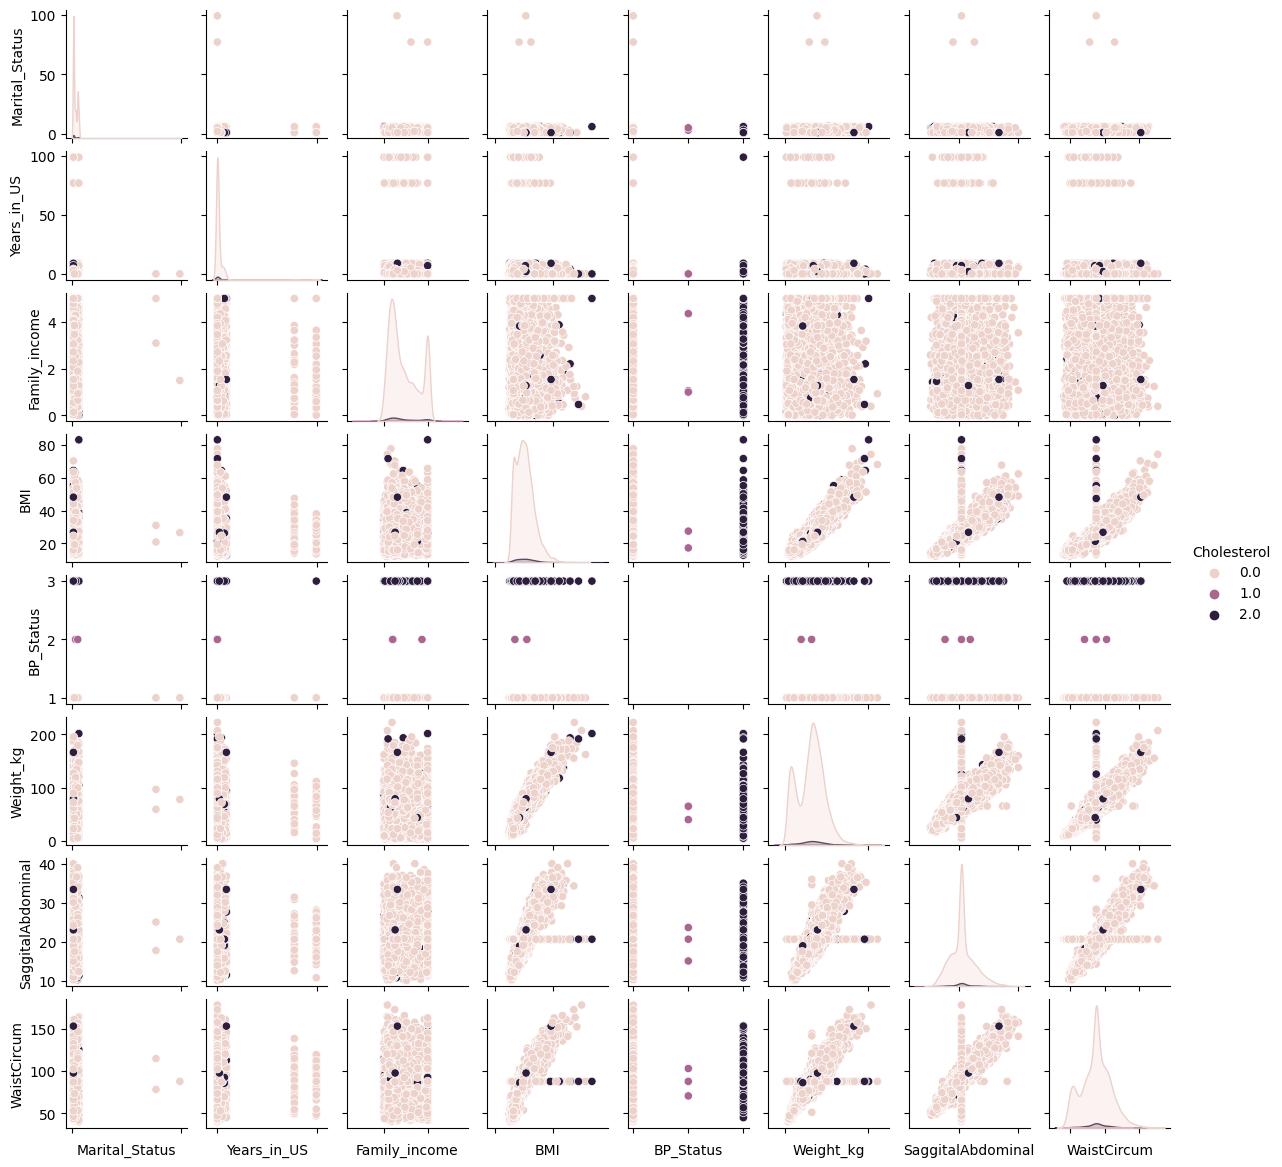

In [16]:
show = sns.pairplot(df.drop(['ID', 'Gender'], axis=1), hue='Cholesterol', size=1.5, diag_kind='kde')

show.set(xticklabels=[])

<Axes: >

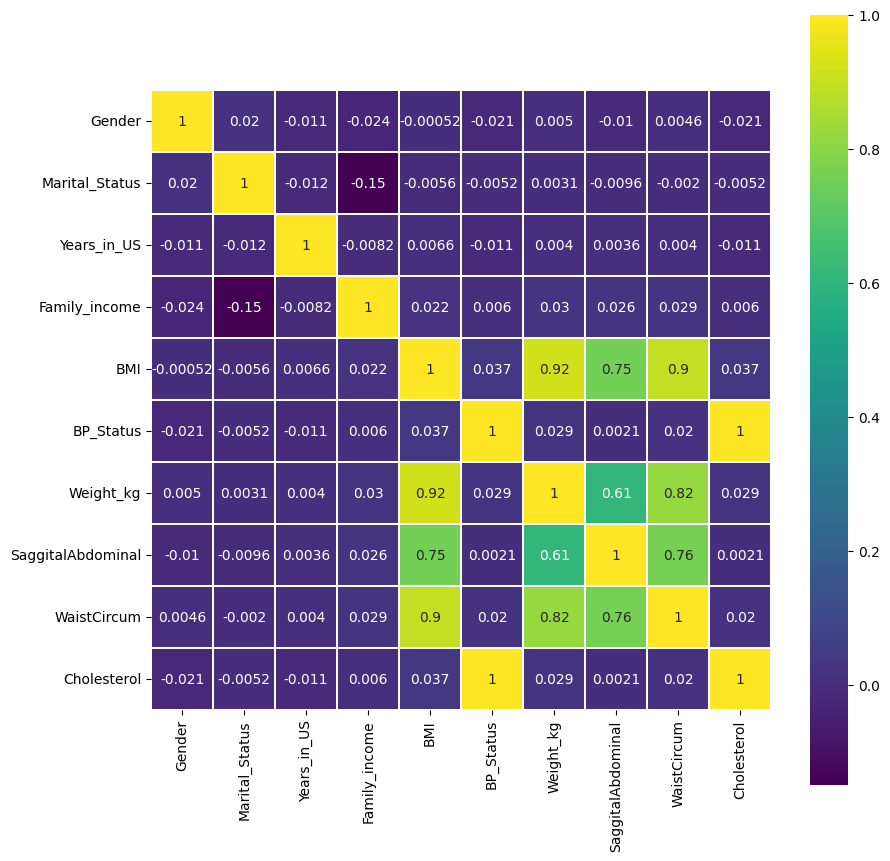

In [17]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df.astype(float).drop(axis=1, labels='ID').corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [18]:
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.cross_validation import KFold;
from sklearn.metrics import mean_squared_error, r2_score

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [ ]:
df.drop(['BP_Status'], axis = 1, inplace=True)

df.head(5)

In [ ]:
data = df.drop(['Cholesterol'], axis=1)
target = df[['Cholesterol']]

train_X = data[:6000]
test_X = data[6000:]
train_Y = target[:6000]
test_Y = target[6000:]

lr_regr = linear_model.LinearRegression()

lr_regr.fit(train_X, train_Y)

lr_pred_Cholesterol = lr_regr.predict(test_X)
lr_pred_Cholesterol = lr_regr.predict(test_X)
lr_score = lr_regr.score(test_X, test_Y)

print('LRr_Coefficients: ', lr_regr.coef_)
print('LR_Mean Square Error: %.2f' % average_squared_error(test_Y, lr_pred_Cholesterol))
print('LR_Variance score: %.2f' % r2_score(test_Y, lr_pred_Cholesterol))
print('Score: %.2f' % lr_regr.score(test_X, test_Y))

In [ ]:
from sklearn.cluster import KMeans

In [23]:
from sklearn.cluster import KMeans
kms = KMeans(n_clusters = 3, tol = 0.0005, algorithm="auto")

kms.fit_predict(train_X)

print ("parameters: ", kms.get_params)
print ("predict: ", kms.predict)
print ("\nscore: %.2f" % kms.score(test_X))

NameError: name 'train_X' is not defined

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

ab_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, 
                            learning_rate=0.5, random_state=100)

ab_clf.fit(train_X, train_Y)
print("training....\n")

ab_pred_Cholesterol = ab_clf.predict(test_X)
print('prediction: \n', ab_pred_Cholesterol)

print('\nparms: \n', ab_clf.get_params)

ab_clf_score = ab_clf.score(test_X, test_Y)
print("\nmean accuracy: %.2f" % ab_clf.score(test_X, test_Y))

NameError: name 'train_X' is not defined

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

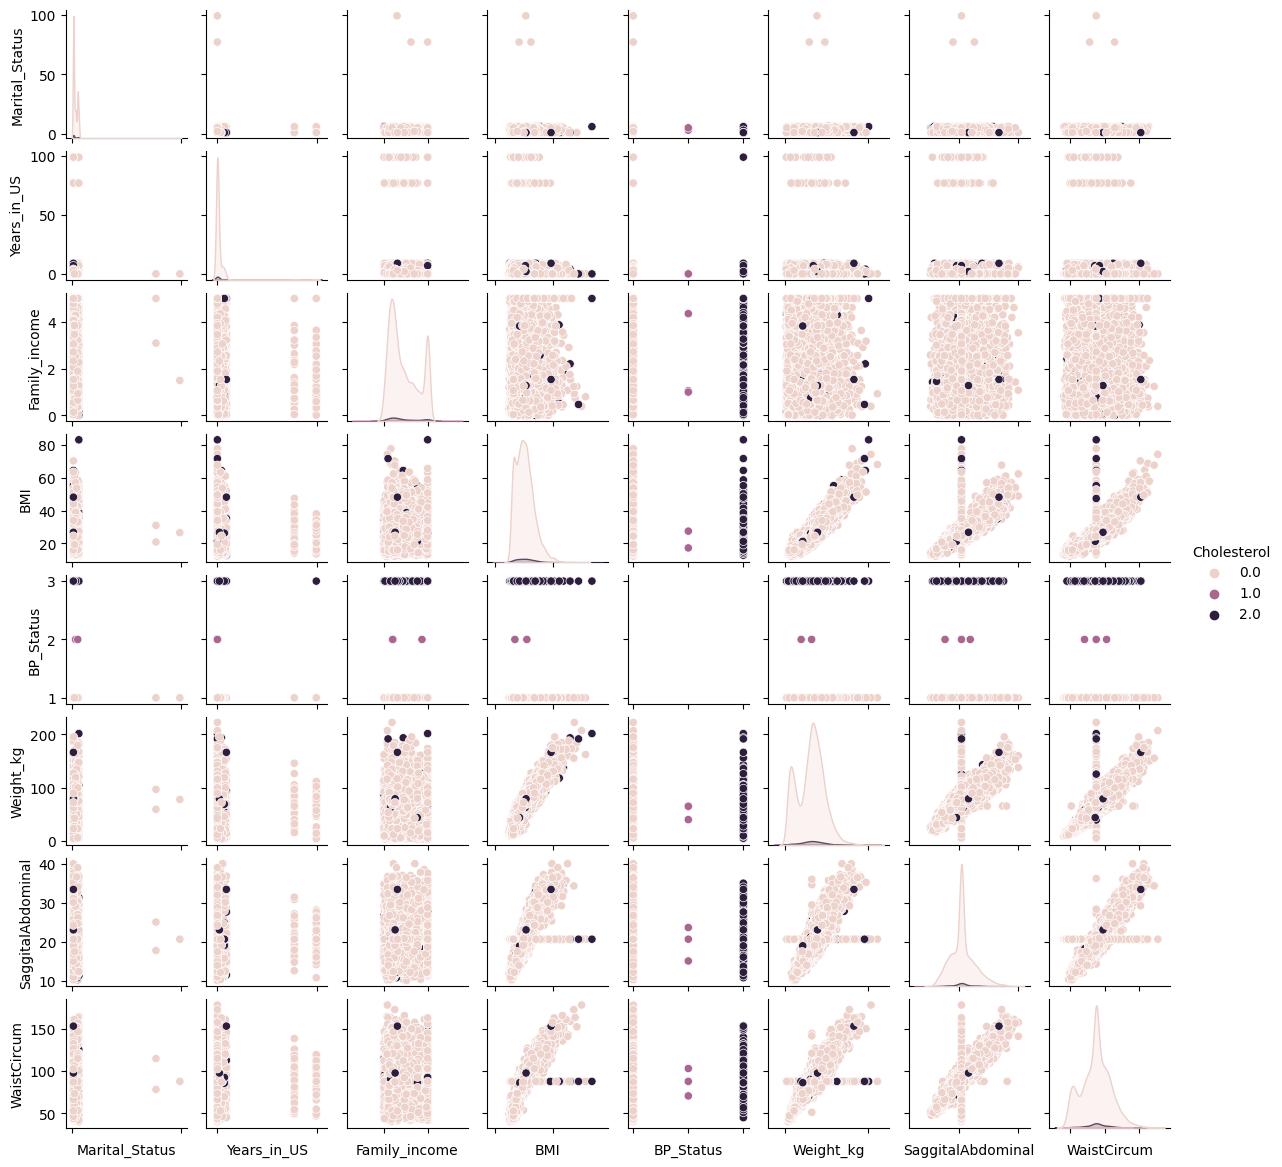

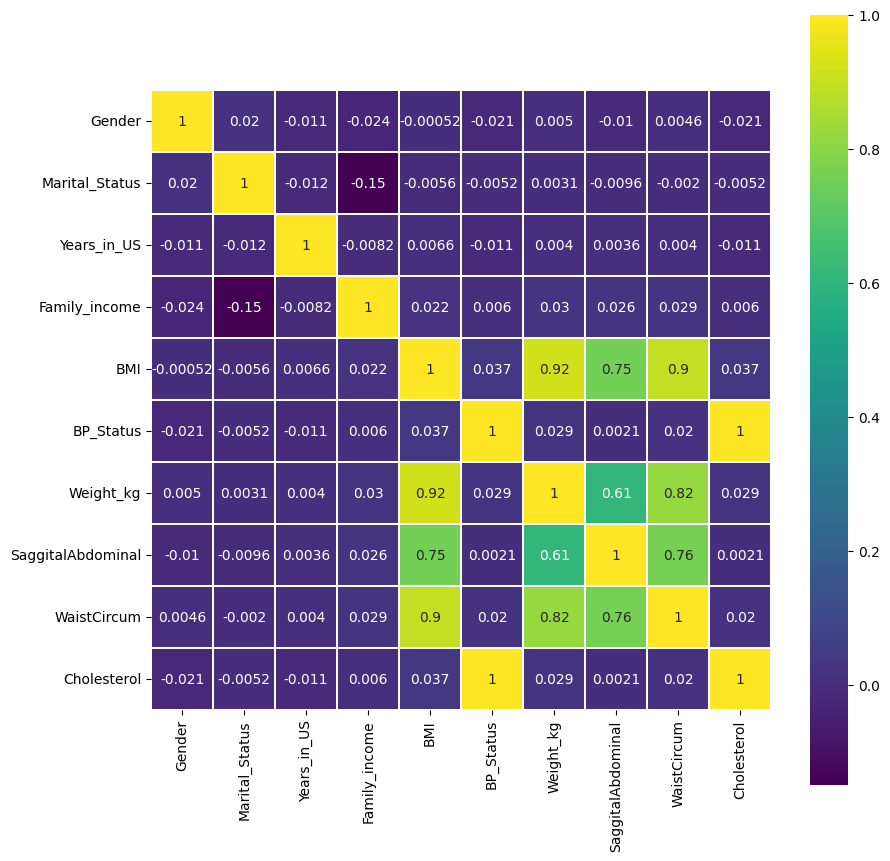

In [27]:
import numpy as np 
import pandas as pd 
from subprocess import check_output

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import re
import sklearn
try:
    from sklearn.feature_selection import VarianceThreshold
except AttributeError:
    pass 

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

df1 = pd.read_csv('labs.csv')
df2 = pd.read_csv('examination.csv')
df3 = pd.read_csv('demographic.csv')
df4 = pd.read_csv('diet.csv')
df5 = pd.read_csv('questionnaire.csv')

df2.drop(['SEQN'], axis = 1, inplace=True)
df3.drop(['SEQN'], axis = 1, inplace=True)
df4.drop(['SEQN'], axis = 1, inplace=True)
df5.drop(['SEQN'], axis = 1, inplace=True)

df = pd.concat([df1, df2], axis=1, join='inner')
df = pd.concat([df, df3], axis=1, join='inner')
df = pd.concat([df, df4], axis=1, join='inner')
df = pd.concat([df, df5], axis=1, join='inner')


df.describe()

from sklearn.feature_selection import VarianceThreshold

df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')

df = df.rename(columns = {'SEQN' : 'ID',
                          'RIAGENDR' : 'Gender',
                          'DMDMARTL' : 'Marital_Status',
                          'PEASCST1' : 'BP_Status',
                          'BMDAVSAD' : 'SaggitalAbdominal',
                          'BMXBMI' : 'BMI',
                          'BMXWAIST' : 'WaistCircum',
                          'BMXWT' : 'Weight_kg',
                          'DMDYRSUS' : 'Years_in_US',
                          'INDFMPIR' : 'Family_income'})



df = df.loc[:, ['ID', 'Gender', 'Marital_Status', 'Years_in_US', 'Family_income', 'BMI', 'BP_Status', 'Weight_kg', 'SaggitalAbdominal', 'WaistCircum']]

df.describe()

from sklearn.feature_selection import VarianceThreshold

df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')

df['Years_in_US'] = df['Years_in_US'].apply(lambda x: x if x > 0 else 0)

df['BP_Status'] = df['BP_Status'].fillna(df['BP_Status'].median())
df['SaggitalAbdominal'] = df['SaggitalAbdominal'].fillna(df['SaggitalAbdominal'].median())
df['WaistCircum'] = df['WaistCircum'].fillna(df['WaistCircum'].median())
df['Weight_kg'] = df['Weight_kg'].fillna(df['Weight_kg'].median())


df['Family_income'] = df['Family_income'].fillna(method='ffill')

df['Gender'] = df['Gender'].fillna(value = 1)


df.describe()
df.loc[df['BP_Status'] <= 1, 'Cholesterol'] = 0
df.loc[(df['BP_Status'] >= 2) & (df['BP_Status'] <= 2), 'Cholesterol'] = 1
df.loc[df['BP_Status'] >= 3, 'Cholesterol'] = 2

df.head(10)
show = sns.pairplot(df.drop(['ID', 'Gender'], axis=1), hue='Cholesterol', size=1.5, diag_kind='kde')

show.set(xticklabels=[])
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df.astype(float).drop(axis=1, labels='ID').corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
df.drop(['BP_Status'], axis = 1, inplace=True)

df.head(5)
data = df.drop(['Cholesterol'], axis=1)
target = df[['Cholesterol']]

train_X = data[:6000]
test_X = data[6000:]
train_Y = target[:6000]
test_Y = target[6000:]

lr_regr = linear_model.LinearRegression()

lr_regr.fit(train_X, train_Y)

lr_pred_Cholesterol = lr_regr.predict(test_X)
lr_pred_Cholesterol = lr_regr.predict(test_X)
lr_score = lr_regr.score(test_X, test_Y)

print('LRr_Coefficients: ', lr_regr.coef_)
print('LR_Mean Square Error: %.2f' % average_squared_error(test_Y, lr_pred_Cholesterol))
print('LR_Variance score: %.2f' % r2_score(test_Y, lr_pred_Cholesterol))
print('Score: %.2f' % lr_regr.score(test_X, test_Y))
from sklearn.cluster import KMeans
kms = KMeans(n_clusters = 3, tol = 0.0005, algorithm="auto")

kms.fit_predict(train_X)

print ("parameters: ", kms.get_params)
print ("predict: ", kms.predict)
print ("\nscore: %.2f" % kms.score(test_X))
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

ab_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, 
                            learning_rate=0.5, random_state=100)

ab_clf.fit(train_X, train_Y)
print("training....\n")

ab_pred_Cholesterol = ab_clf.predict(test_X)
print('prediction: \n', ab_pred_Cholesterol)

print('\nparms: \n', ab_clf.get_params)

ab_clf_score = ab_clf.score(test_X, test_Y)
print("\nmean accuracy: %.2f" % ab_clf.score(test_X, test_Y))
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(base_estimator= DecisionTreeClassifier(), max_samples = 0.5, max_features = 0.5, 
                            bootstrap = False, bootstrap_features = False)

bagging.fit(train_X, train_Y)
bg_pred_LDL = bagging.predict(test_X)

bg_dt_score = bagging.score(test_X, test_Y)
bagging.score(test_X, test_Y)
bagging = BaggingClassifier(base_estimator= KNeighborsClassifier(), max_samples = 0.5, max_features = 0.5, 
                            bootstrap = False, bootstrap_features = False)

bagging.fit(train_X, train_Y)
bg_pred_LDL = bagging.predict(test_X)

bg_score = bagging.score(test_X, test_Y)
bagging.score(test_X, test_Y)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol = 0.0001)

mlp.fit(train_X, train_Y)
mlp_pred_LDL = mlp.predict(test_X)

print("parameter: ", mlp.get_params())

mlp_score = mlp.score(test_X, test_Y)
mlp.score(test_X, test_Y)
d = {'Model': ['Linear Regression', 'Adaboost', 'Bagging_decision tree based', 'Bagging_KNeighbors', 'MLP'],
     'accuracy' : [lr_score, ab_clf_score, bg_dt_score, bg_score, mlp_score]}

result_df = pd.DataFrame(data = d)
result_df
result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), title='Cholesterol Level prediction, Low Density Lipoprotein (LDL)', 
               sort_columns=True)

In [41]:
import random

responses = {
    "fever": "You may have a fever. It's essential to rest and drink plenty of fluids. Consider taking over-the-counter acetaminophen (e.g., Tylenol) following the recommended dosage on the label.",
    "headache": "A headache can be due to various causes. Ensure you are well-hydrated and have had enough rest. Over-the-counter ibuprofen (e.g., Advil) can help alleviate pain if needed, but please follow the recommended dosage.",
    "cough": "A persistent cough could indicate an underlying issue. Stay hydrated, and consider over-the-counter cough syrup. If the cough persists, consult a healthcare professional for a proper diagnosis.",
    "sore throat": "A sore throat is often due to a viral infection. Gargling with warm saltwater can help soothe it. Over-the-counter throat lozenges may provide relief. If the sore throat persists or worsens, consult a doctor.",
    "fatigue": "Fatigue can result from various factors, including inadequate sleep, stress, or an underlying health issue. Make sure you are getting enough rest, maintaining a balanced diet, and managing stress.",
    "diarrhea": "Diarrhea may result from infections, food intolerances, or other causes. Consume clear fluids like water or oral rehydration solutions (ORS). Avoid dairy, caffeine, and fatty foods. If severe or prolonged, consult a doctor.",
    "vomiting": "Vomiting can be caused by stomach infections or food poisoning. Stay hydrated by sipping water or clear fluids. Gradually reintroduce bland foods as tolerated. If vomiting is severe or prolonged, seek medical advice.",
    "shortness of breath": "Shortness of breath can be due to various reasons, including respiratory issues or anxiety. If you experience severe or persistent shortness of breath, seek immediate medical attention.",
    "chest pain": "Chest pain can be caused by multiple factors, including heart issues. If you have severe chest pain, especially if it radiates to your arm, neck, or jaw, call emergency services immediately.",
    "rash": "Rashes may be due to allergies, infections, or skin conditions. Avoid scratching, keep the area clean, and apply an over-the-counter hydrocortisone cream if itchy. If the rash spreads or worsens, consult a dermatologist.",
    "earache": "Earaches may be due to ear infections or other issues. Avoid inserting objects into the ear. Apply a warm compress to the affected ear for relief. Consult a doctor for an accurate diagnosis and potential treatment if necessary.",
    "abdominal pain": "Abdominal pain can be caused by various issues, including digestive problems. Avoid heavy meals, stay hydrated, and consider over-the-counter antacids or gas-relief medication. If the pain persists or worsens, consult a doctor.",
    "runny nose": "A runny nose is often due to viral infections or allergies. Stay hydrated, rest, and consider over-the-counter antihistamines (e.g., Benadryl) if needed.",
    "joint pain": "Joint pain may be due to arthritis or other conditions. Rest, gentle exercise, and over-the-counter pain relievers (e.g., ibuprofen) can help alleviate pain. If joint pain persists, consult a rheumatologist or orthopedic specialist.",
    "back pain": "Back pain can have various causes, including muscle strain. Rest, gentle stretching, and over-the-counter pain relievers (e.g., ibuprofen) can provide relief. If back pain is chronic or severe, consult a physician.",
    "nosebleed": "Nosebleeds can be caused by dry air or nose picking. Lean forward, pinch your nostrils together, and breathe through your mouth to stop the bleeding. If nosebleeds are frequent or severe, consult an ear, nose, and throat specialist.",
    "toothache": "A toothache can be due to dental issues or infections. Rinse your mouth with warm water and floss to ensure nothing is stuck between teeth. Over-the-counter pain relievers may provide temporary relief, but it's crucial to see a dentist for a thorough evaluation.",
    "eye redness": "Redness in the eyes can result from allergies or eye irritation. Avoid rubbing your eyes and use over-the-counter artificial tears to soothe them. If redness persists or is accompanied by pain, consult an eye specialist (ophthalmologist).",
    "swollen ankles": "Swollen ankles can be caused by various factors, including fluid retention. Elevate your legs and avoid sitting or standing for extended periods. If swelling is severe or persistent, consult a healthcare professional.",
    "nausea": "Nausea can result from stomach issues or morning sickness. Sip clear fluids and eat bland foods like crackers. If nausea persists or is severe, consult a healthcare professional for further evaluation.",
    "unexplained weight loss": "Unexplained weight loss can have various underlying causes, including medical conditions. If you are experiencing significant weight loss without trying, it's essential to consult a healthcare professional for a thorough evaluation.",
    "hair loss": "Hair loss may result from various factors, including genetics, stress, or underlying health issues. Ensure a balanced diet, manage stress, and consult a dermatologist if hair loss is a concern.",
    "muscle cramps": "Muscle cramps can be caused by dehydration or overuse. Stay hydrated, gently stretch the affected muscles, and apply warmth to the area. If cramps are frequent or severe, consult a physician.",
    "sunburn": "Sunburn results from excessive sun exposure. Stay out of the sun, apply aloe vera gel to soothe the skin, and take over-the-counter pain relievers if necessary. Protect your skin with sunscreen and clothing to prevent future sunburn.",
    "anxiety": "Anxiety can lead to physical symptoms. Practice relaxation techniques, exercise regularly, and consider therapy if anxiety is affecting your daily life. Consult a mental health professional for guidance.",
    "insomnia": "Insomnia can result from various factors, including stress and poor sleep habits. Maintain a regular sleep schedule, create a relaxing bedtime routine, and avoid caffeine and electronics before bed. If insomnia persists, consult a healthcare professional.",
    "burn": "Burns can vary in severity. For minor burns, run cool water over the area for several minutes and apply a sterile dressing. Seek medical attention for severe or chemical burns.",
    "bloating": "Bloating can result from overeating, gas, or dietary choices. Avoid carbonated beverages, high-fiber foods, and large meals. If bloating persists or is painful, consult a doctor.",
    "constipation": "Constipation can be due to dietary choices or underlying medical conditions. Ensure you are consuming enough fiber, drink plenty of water, and consider over-the-counter laxatives if needed. Consult a doctor if constipation is persistent.",
    "dizziness": "Dizziness can have various causes, including dehydration or inner ear issues. Sit or lie down if you feel dizzy, drink water, and rest. If dizziness is persistent or severe, consult a healthcare professional.",
    "acid reflux": "Acid reflux can result from dietary choices or underlying conditions. Avoid trigger foods, stay upright after meals, and consider over-the-counter antacids. If acid reflux persists, consult a healthcare professional.",
    "sweating": "Excessive sweating may be due to hyperhidrosis or other factors. Use antiperspirants and wear breathable fabrics. If sweating is excessive and affects your daily life, consult a dermatologist.",
    "pneumonia": "Pneumonia can result in fever, cough, and difficulty breathing. Seek immediate medical attention if you suspect pneumonia. Antibiotics may be necessary for treatment.",
    "asthma": "Asthma can cause shortness of breath, wheezing, and coughing. If you have been diagnosed with asthma, use your prescribed inhaler as directed. Consult an asthma specialist for proper management.",
    "anemia": "Anemia may result in fatigue and paleness. Ensure you have a diet rich in iron or take iron supplements if recommended by a healthcare professional. Consult a doctor for a complete blood count (CBC) to confirm the diagnosis and guide treatment.",
    "migraine": "Migraines can be debilitating and may include severe head pain, nausea, and sensitivity to light. If you experience frequent migraines, consult a healthcare professional for a personalized treatment plan.",
    "gout": "Gout can lead to sudden joint pain and swelling, often in the big toe. Maintain a low-purine diet and consider prescribed medications for gout management. Consult a rheumatologist for personalized care.",
    "menstrual cramps": "Menstrual cramps can be alleviated with over-the-counter pain relievers, heating pads, and regular exercise. If cramps are severe, consult a gynecologist for potential treatments.",
    "diabetes": "Diabetes requires careful management. Follow your prescribed treatment plan, monitor your blood sugar, and maintain a balanced diet. Consult an endocrinologist for guidance.",
    "hypertension": "Hypertension (high blood pressure) can be managed with lifestyle changes and prescribed medications. Monitor your blood pressure regularly and consult a cardiologist for guidance.",
    "gastroenteritis": "Gastroenteritis may lead to diarrhea, vomiting, and abdominal pain. Stay hydrated, consume bland foods, and rest. If symptoms worsen or persist, consult a healthcare professional.",
    "laryngitis": "Laryngitis can result in the loss of voice or hoarseness. Rest your voice, stay hydrated, and avoid irritants like smoking. If laryngitis is persistent, consult an ear, nose, and throat specialist (otolaryngologist).",
    "depression": "Depression can have physical and emotional symptoms. Consult a mental health professional for evaluation and potential therapy or medication.",
    "eczema": "Eczema can cause itchy, red, and inflamed skin. Keep the skin well-moisturized and use prescribed creams or ointments. Consult a dermatologist for proper management.",
    "sinusitis": "Sinusitis may lead to facial pain, nasal congestion, and post-nasal drip. Stay hydrated, use saline nasal sprays, and consider over-the-counter decongestants. If sinusitis persists, consult an ear, nose, and throat specialist.",
    "common cold": "Common cold symptoms include a runny nose, sneezing, and coughing. Rest and stay hydrated. Over-the-counter cold medications may help alleviate symptoms.",
    "concussion": "A concussion is a head injury and requires immediate medical attention. Rest, avoid strenuous activities, and follow a healthcare professional's advice for recovery.",
    "flu": "Flu symptoms include fever, body aches, and fatigue. Rest, stay hydrated, and consult a healthcare professional for antiviral medications if needed.",
    "stomach flu": "Stomach flu symptoms include vomiting and diarrhea. Stay hydrated, consume clear fluids, and avoid solid foods until symptoms improve. If vomiting and diarrhea persist, consult a doctor.",
    "heatstroke": "Heatstroke is a medical emergency caused by overheating. Move to a cooler place, hydrate, and seek immediate medical attention.",
    "hypoglycemia": "Hypoglycemia (low blood sugar) can lead to shakiness and confusion. Consume a fast-acting carbohydrate, such as fruit juice or glucose tablets, and consult a healthcare professional for diabetes management.",
    "irritable bowel syndrome": "Irritable bowel syndrome (IBS) can result in abdominal pain and changes in bowel habits. Maintain a balanced diet, manage stress, and consult a gastroenterologist for guidance on IBS management.",
    "mumps": "Mumps may cause swelling of the salivary glands. Rest, stay hydrated, and consult a healthcare professional for appropriate management.",
    "osteoporosis": "Osteoporosis weakens bones, making them prone to fractures. Consume calcium-rich foods, engage in weight-bearing exercises, and consult a rheumatologist for osteoporosis management.",
    "ringworm": "Ringworm is a fungal infection that causes a circular rash. Keep the area clean, dry, and use over-the-counter antifungal creams. Consult a dermatologist if the rash persists.",
    "tuberculosis": "Tuberculosis (TB) is a serious respiratory infection. Seek immediate medical attention if TB is suspected. Treatment typically involves a combination of antibiotics.",
    "urinary tract infection": "A urinary tract infection (UTI) can lead to painful urination and frequent urination. Stay hydrated, consume cranberry juice, and consult a healthcare professional for antibiotics if necessary.",
    "vertigo": "Vertigo can cause dizziness and a spinning sensation. Rest and avoid sudden movements. Consult a healthcare professional if vertigo is persistent or severe.",
    "whooping cough": "Whooping cough can lead to severe coughing fits and difficulty breathing. Consult a healthcare professional for antibiotics and supportive care.",
    "yellow fever": "Yellow fever is a mosquito-borne illness. Seek immediate medical attention if yellow fever is suspected. Vaccination can help prevent it.",
    "lymphoma": "Lymphoma is a type of cancer that affects the lymphatic system. Consult an oncologist for a proper diagnosis and personalized treatment plan.",
    "hepatitis": "Hepatitis is a viral liver infection. Seek medical attention for diagnosis and management, which may include antiviral medications.",
    "alcohol withdrawal": "Alcohol withdrawal can be dangerous. Seek medical help for a safe and supervised detoxification process.",
    "anaphylaxis": "Anaphylaxis is a severe allergic reaction and requires immediate medical attention. Use an epinephrine auto-injector if available.",
    "endometriosis": "Endometriosis is a painful condition in which tissue similar to the uterine lining grows outside the uterus. Consult a gynecologist for diagnosis and treatment options.",
    "glaucoma": "Glaucoma is an eye condition that can lead to vision loss. Consult an ophthalmologist for regular eye exams and management if diagnosed with glaucoma.",
    "irregular heartbeat": "An irregular heartbeat can have various causes. Consult a cardiologist for proper evaluation and management.",
    "psoriasis": "Psoriasis is a skin condition that can cause red, scaly patches. Consult a dermatologist for appropriate treatment and management.",
    "thyroid disorder": "Thyroid disorders can lead to a range of symptoms. Consult an endocrinologist for thyroid function tests and personalized treatment.",
    "varicose veins": "Varicose veins are swollen, twisted veins. Elevate your legs, wear compression stockings, and consult a vascular specialist for potential treatments.",
    "acne": "Acne is a common skin condition. Keep the skin clean and use over-the-counter acne treatments. Consult a dermatologist for more severe cases.",
    "autism": "Autism is a neurodevelopmental disorder. Consult a pediatrician or developmental specialist for evaluation and potential interventions.",
    "bipolar disorder": "Bipolar disorder is a mood disorder. Consult a mental health professional for diagnosis and treatment options.",
    "crohn's disease": "Crohn's disease is a chronic inflammatory bowel disease. Consult a gastroenterologist for diagnosis and management.",
    "fibromyalgia": "Fibromyalgia can cause widespread pain and fatigue. Consult a rheumatologist for a proper diagnosis and personalized treatment plan.",
    "herniated disc": "A herniated disc can lead to back pain and other symptoms. Consult an orthopedic specialist for evaluation and potential treatments.",
    "lupus": "Lupus is an autoimmune disease that can affect various organs. Consult a rheumatologist for diagnosis and management.",
    "multiple sclerosis": "Multiple sclerosis (MS) is a neurological condition. Consult a neurologist for diagnosis and treatment options.",
    "schizophrenia": "Schizophrenia is a severe mental disorder. Consult a psychiatrist for diagnosis and treatment options.",
    "ulcerative colitis": "Ulcerative colitis is a chronic inflammatory bowel disease. Consult a gastroenterologist for diagnosis and management.",
    "alzheimer's disease": "Alzheimer's disease is a progressive neurological disorder. Consult a neurologist for diagnosis and support.",
    "parkinson's disease": "Parkinson's disease is a neurodegenerative disorder. Consult a neurologist for diagnosis and management.",
    "amyotrophic lateral sclerosis (ALS)": "ALS is a progressive neurodegenerative disease. Consult a neurologist for diagnosis and support.",
    "cerebral palsy": "Cerebral palsy is a neurological disorder that affects movement and muscle coordination. Consult a pediatrician or neurologist for evaluation and interventions.",
    "down syndrome": "Down syndrome is a genetic disorder. Consult a genetic counselor or pediatrician for diagnosis and support.",
    "anorexia nervosa": "Anorexia nervosa is an eating disorder. Consult a healthcare professional for diagnosis and treatment options.",
    "bulimia nervosa": "Bulimia nervosa is an eating disorder. Consult a healthcare professional for diagnosis and treatment options.",
    "obsessive-compulsive disorder (OCD)": "OCD is an anxiety disorder. Consult a mental health professional for diagnosis and treatment options.",
    "post-traumatic stress disorder (PTSD)": "PTSD is an anxiety disorder. Consult a mental health professional for diagnosis and treatment options.",
    "borderline personality disorder": "Borderline personality disorder is a mental health condition. Consult a mental health professional for diagnosis and treatment options.",
    "antisocial personality disorder": "Antisocial personality disorder is a mental health condition. Consult a mental health professional for diagnosis and treatment options.",
    "narcissistic personality disorder": "Narcissistic personality disorder is a mental health condition. Consult a mental health professional for diagnosis and treatment options.",
    "schizoaffective disorder": "Schizoaffective disorder is a mental health condition. Consult a mental health professional for diagnosis and treatment options.",
    "tourette syndrome": "Tourette syndrome is a neurological disorder. Consult a neurologist or pediatrician for diagnosis and support.",
    "fibroids": "Fibroids are noncancerous growths in the uterus. Consult a gynecologist for evaluation and potential treatments.",
    "cervical cancer": "Cervical cancer is a type of cancer that affects the cervix. Consult a gynecologist for regular screenings and potential interventions.",
    "testicular cancer": "Testicular cancer is a type of cancer that affects the testicles. Consult a urologist for regular screenings and potential interventions.",
    "pancreatic cancer": "Pancreatic cancer is a type of cancer that affects the pancreas. Consult an oncologist for diagnosis and potential treatments.",
    "lung cancer": "Lung cancer is a type of cancer that affects the lungs. Consult an oncologist for diagnosis and potential treatments.",
    "breast cancer": "Breast cancer is a type of cancer that affects the breast tissue. Consult a breast specialist or oncologist for regular screenings and potential interventions.",
    "prostate cancer": "Prostate cancer is a type of cancer that affects the prostate gland. Consult a urologist for regular screenings and potential interventions.",
    "colon cancer": "Colon cancer is a type of cancer that affects the colon. Consult a gastroenterologist for regular screenings and potential interventions.",
    "leukemia": "Leukemia is a type of cancer that affects the blood and bone marrow. Consult a hematologist or oncologist for diagnosis and potential treatments.",
    "ovarian cancer": "Ovarian cancer is a type of cancer that affects the ovaries. Consult a gynecologist for regular screenings and potential interventions.",
    "melanoma": "Melanoma is a type of skin cancer. Consult a dermatologist for regular skin exams and potential treatments.",
    "kidney disease": "Kidney disease can have various causes. Maintain a healthy diet, stay hydrated, and consult a nephrologist for evaluation and management.",
    "liver disease": "Liver disease can result from various factors. Consult a hepatologist or gastroenterologist for diagnosis and potential treatments.",
    "heart disease": "Heart disease can have various causes. Maintain a heart-healthy lifestyle, including a balanced diet and regular exercise. Consult a cardiologist for risk assessment and management.",
    "stroke": "A stroke is a medical emergency and requires immediate medical attention. Recognize the signs of a stroke (FAST: Face drooping, Arm weakness, Speech difficulties, Time to call 911).",
    "blood clots": "Blood clots can form in veins or arteries and may require anticoagulant medications. Consult a healthcare professional for diagnosis and management.",
    "obesity": "Obesity can increase the risk of various health issues. Maintain a balanced diet and exercise regularly. Consult a healthcare professional for personalized weight management.",
    "anemia": "Anemia may result from a lack of red blood cells. Ensure you have a diet rich in iron or take iron supplements if recommended by a healthcare professional. Consult a doctor for a complete blood count (CBC) to confirm the diagnosis and guide treatment.",
    "hypertension": "Hypertension (high blood pressure) can be managed with lifestyle changes and prescribed medications. Monitor your blood pressure regularly and consult a cardiologist for guidance.",
    "gastroenteritis": "Gastroenteritis may lead to diarrhea, vomiting, and abdominal pain. Stay hydrated, consume bland foods, and rest. If symptoms worsen or persist, consult a healthcare professional.",
    "laryngitis": "Laryngitis can result in the loss of voice or hoarseness. Rest your voice, stay hydrated, and avoid irritants like smoking. If laryngitis is persistent, consult an ear, nose, and throat specialist (otolaryngologist).",
    "depression": "Depression can have physical and emotional symptoms. Consult a mental health professional for evaluation and potential therapy or medication.",
    "eczema": "Eczema is a skin condition that can cause red, scaly patches. Keep the skin well-moisturized and use prescribed creams or ointments. Consult a dermatologist for proper management.",
    "sinusitis": "Sinusitis may lead to facial pain, nasal congestion, and post-nasal drip. Stay hydrated, use saline nasal sprays, and consider over-the-counter decongestants. If sinusitis persists, consult an ear, nose, and throat specialist.",
    "common cold": "Common cold symptoms include a runny nose, sneezing, and coughing. Rest and stay hydrated. Over-the-counter cold medications may help alleviate symptoms.",
    "concussion": "A concussion is a head injury and requires immediate medical attention. Rest, avoid strenuous activities, and follow a healthcare professional's advice for recovery.",
    "flu": "Flu symptoms include fever, body aches, and fatigue. Rest, stay hydrated, and consult a healthcare professional for antiviral medications if needed.",
    "stomach flu": "Stomach flu symptoms include vomiting and diarrhea. Stay hydrated, consume clear fluids, and avoid solid foods until symptoms improve. If vomiting and diarrhea persist, consult a doctor.",
    "heatstroke": "Heatstroke is a medical emergency caused by overheating. Move to a cooler place, hydrate, and seek immediate medical attention.",
    "hypoglycemia": "Hypoglycemia (low blood sugar) can lead to shakiness and confusion. Consume a fast-acting carbohydrate, such as fruit juice or glucose tablets, and consult a healthcare professional for diabetes management.",
    "irritable bowel syndrome": "Irritable bowel syndrome (IBS) can result in abdominal pain and changes in bowel habits. Maintain a balanced diet, manage stress, and consult a gastroenterologist for guidance on IBS management.",
    "mumps": "Mumps may cause swelling of the salivary glands. Rest, stay hydrated, and consult a healthcare professional for appropriate management.",
    "osteoporosis": "Osteoporosis weakens bones, making them prone to fractures. Consume calcium-rich foods, engage in weight-bearing exercises, and consult a rheumatologist for osteoporosis management.",
    "ringworm": "Ringworm is a fungal infection that causes a circular rash. Keep the area clean, dry, and use over-the-counter antifungal creams. Consult a dermatologist if the rash persists.",
    "tuberculosis": "Tuberculosis (TB) is a serious respiratory infection. Seek immediate medical attention if TB is suspected. Treatment typically involves a combination of antibiotics.",
    "urinary tract infection": "A urinary tract infection (UTI) can lead to painful urination and frequent urination. Stay hydrated, consume cranberry juice, and consult a healthcare professional for antibiotics if necessary.",
    "vertigo": "Vertigo can cause dizziness and a spinning sensation. Rest and avoid sudden movements. Consult a healthcare professional if vertigo is persistent or severe.",
    "whooping cough": "Whooping cough can lead to severe coughing fits and difficulty breathing. Consult a healthcare professional for antibiotics and supportive care.",
    "yellow fever": "Yellow fever is a mosquito-borne illness. Seek immediate medical attention if yellow fever is suspected. Vaccination can help prevent it.",
    "lymphoma": "Lymphoma is a type of cancer that affects the lymphatic system. Consult an oncologist for a proper diagnosis and personalized treatment plan.",
    "hepatitis": "Hepatitis is a viral liver infection. Seek medical attention for diagnosis and management, which may include antiviral medications.",
    "alcohol withdrawal": "Alcohol withdrawal can be dangerous. Seek medical help for a safe and supervised detoxification process.",
    "anaphylaxis": "Anaphylaxis is a severe allergic reaction and requires immediate medical attention. Use an epinephrine auto-injector if available.",
    "endometriosis": "Endometriosis is a painful condition in which tissue similar to the uterine lining grows outside the uterus. Consult a gynecologist for diagnosis and treatment options.",
    "glaucoma": "Glaucoma is an eye condition that can lead to vision loss. Consult an ophthalmologist for regular eye exams and management if diagnosed with glaucoma.",
    "irregular heartbeat": "An irregular heartbeat can have various causes. Consult a cardiologist for proper evaluation and management.",
    "psoriasis": "Psoriasis is a skin condition that can cause red, scaly patches. Consult a dermatologist for appropriate treatment and management.",
    "thyroid disorder": "Thyroid disorders can lead to a range of symptoms. Consult an endocrinologist for thyroid function tests and personalized treatment.",
    "varicose veins": "Varicose veins are swollen, twisted veins. Elevate your legs, wear compression stockings, and consult a vascular specialist for potential treatments.",
    "acne": "Acne is a common skin condition. Keep the skin clean and use over-the-counter acne treatments. Consult a dermatologist for more severe cases.",
    "autism": "Autism is a neurodevelopmental disorder. Consult a pediatrician or developmental specialist for evaluation and potential interventions.",
    "bipolar disorder": "Bipolar disorder is a mood disorder. Consult a mental health professional for diagnosis and treatment options.",
    "crohn's disease": "Crohn's disease is a chronic inflammatory bowel disease. Consult a gastroenterologist for diagnosis and management.",
    "fibromyalgia": "Fibromyalgia can cause widespread pain and fatigue. Consult a rheumatologist for a proper diagnosis and personalized treatment plan.",
    "herniated disc": "A herniated disc can lead to back pain and other symptoms. Consult an orthopedic specialist for evaluation and potential treatments.",
    "lupus": "Lupus is an autoimmune disease that can affect various organs. Consult a rheumatologist for diagnosis and management.",
    "multiple sclerosis": "Multiple sclerosis (MS) is a neurological condition. Consult a neurologist for diagnosis and treatment options.",
    "schizophrenia": "Schizophrenia is a severe mental disorder. Consult a psychiatrist for diagnosis and treatment options.",
    "ulcerative colitis": "Ulcerative colitis is a chronic inflammatory bowel disease. Consult a gastroenterologist for diagnosis and management.",
    "alzheimer's disease": "Alzheimer's disease is a progressive neurological disorder. Consult a neurologist for diagnosis and support.",
    "parkinson's disease": "Parkinson's disease is a neurodegenerative disorder. Consult a neurologist for diagnosis and management.",
    "amyotrophic lateral sclerosis (ALS)": "ALS is a progressive neurodegenerative disease. Consult a neurologist for diagnosis and support.",
    "cerebral palsy": "Cerebral palsy is a neurological disorder that affects movement and muscle coordination. Consult a pediatrician or neurologist for evaluation and interventions.",
    "down syndrome": "Down syndrome is a genetic disorder. Consult a genetic counselor or pediatrician for diagnosis and support.",
    "anorexia nervosa": "Anorexia nervosa is an eating disorder. Consult a healthcare professional for diagnosis and treatment options.",
    "bulimia nervosa": "Bulimia nervosa is an eating disorder. Consult a healthcare professional for diagnosis and treatment options.",
    "obsessive-compulsive disorder (OCD)": "OCD is an anxiety disorder. Consult a mental health professional for diagnosis and treatment options.",
    "post-traumatic stress disorder (PTSD)": "PTSD is an anxiety disorder. Consult a mental health professional for diagnosis and treatment options.",
    "borderline personality disorder": "Borderline personality disorder is a mental health condition. Consult a mental health professional for diagnosis and treatment options.",
    "antisocial personality disorder": "Antisocial personality disorder is a mental health condition. Consult a mental health professional for diagnosis and treatment options.",
    "narcissistic personality disorder": "Narcissistic personality disorder is a mental health condition. Consult a mental health professional for diagnosis and treatment options.",
    "schizoaffective disorder": "Schizoaffective disorder is a mental health condition. Consult a mental health professional for diagnosis and treatment options.",
    "tourette syndrome": "Tourette syndrome is a neurological disorder. Consult a neurologist or pediatrician for diagnosis and support.",
    "fibroids": "Fibroids are noncancerous growths in the uterus. Consult a gynecologist for evaluation and potential treatments.",
    "cervical cancer": "Cervical cancer is a type of cancer that affects the cervix. Consult a gynecologist for regular screenings and potential interventions.",
    "testicular cancer": "Testicular cancer is a type of cancer that affects the testicles. Consult a urologist for regular screenings and potential interventions.",
    "pancreatic cancer": "Pancreatic cancer is a type of cancer that affects the pancreas. Consult an oncologist for diagnosis and potential treatments.",
    "lung cancer": "Lung cancer is a type of cancer that affects the lungs. Consult an oncologist for diagnosis and potential treatments.",
    "breast cancer": "Breast cancer is a type of cancer that affects the breast tissue. Consult a breast specialist or oncologist for regular screenings and potential interventions.",
    "prostate cancer": "Prostate cancer is a type of cancer that affects the prostate gland. Consult a urologist for regular screenings and potential interventions.",
    "colon cancer": "Colon cancer is a type of cancer that affects the colon. Consult a gastroenterologist for regular screenings and potential interventions.",
    "leukemia": "Leukemia is a type of cancer that affects the blood and bone marrow. Consult a hematologist or oncologist for diagnosis and potential treatments.",
    "ovarian cancer": "Ovarian cancer is a type of cancer that affects the ovaries. Consult a gynecologist for regular screenings and potential interventions.",
    "melanoma": "Melanoma is a type of skin cancer. Consult a dermatologist for regular skin exams and potential treatments.",
    "kidney disease": "Kidney disease can have various causes. Maintain a healthy diet, stay hydrated, and consult a nephrologist for evaluation and management.",
    "liver disease": "Liver disease can result from various factors. Consult a hepatologist or gastroenterologist for diagnosis and potential treatments.",
    "heart disease": "Heart disease can have various causes. Maintain a heart-healthy lifestyle, including a balanced diet and regular exercise. Consult a cardiologist for risk assessment and management.",
    "stroke": "A stroke is a medical emergency and requires immediate medical attention. Recognize the signs of a stroke (FAST: Face drooping, Arm weakness, Speech difficulties, Time to call 911).",
    "blood clots": "Blood clots can form in veins or arteries and may require anticoagulant medications. Consult a healthcare professional for diagnosis and management.",
    "obesity": "Obesity can increase the risk of various health issues. Maintain a balanced diet and exercise regularly. Consult a healthcare professional for personalized weight management.",
    "leukemia": "Leukemia is a type of cancer that affects the blood and bone marrow. Consult a hematologist or oncologist for diagnosis and potential treatments.",
    "pancreatic cancer": "Pancreatic cancer is a type of cancer that affects the pancreas. Consult an oncologist for diagnosis and potential treatments.",
    "lung cancer": "Lung cancer is a type of cancer that affects the lungs. Consult an oncologist for diagnosis and potential treatments.",
    "breast cancer": "Breast cancer is a type of cancer that affects the breast tissue. Consult a breast specialist or oncologist for regular screenings and potential interventions.",
    "prostate cancer": "Prostate cancer is a type of cancer that affects the prostate gland. Consult a urologist for regular screenings and potential interventions.",
    "colon cancer": "Colon cancer is a type of cancer that affects the colon. Consult a gastroenterologist for regular screenings and potential interventions.",
    "leukemia": "Leukemia is a type of cancer that affects the blood and bone marrow. Consult a hematologist or oncologist for diagnosis and potential treatments.",
    "ovarian cancer": "Ovarian cancer is a type of cancer that affects the ovaries. Consult a gynecologist for regular screenings and potential interventions.",
    "melanoma": "Melanoma is a type of skin cancer. Consult a dermatologist for regular skin exams and potential treatments.",
    "kidney disease": "Kidney disease can have various causes. Maintain a healthy diet, stay hydrated, and consult a nephrologist for evaluation and management.",
    "liver disease": "Liver disease can result from various factors. Consult a hepatologist or gastroenterologist for diagnosis and potential treatments.",
    "heart disease": "Heart disease can have various causes. Maintain a heart-healthy lifestyle, including a balanced diet and regular exercise. Consult a cardiologist for risk assessment and management.",
    "stroke": "A stroke is a medical emergency and requires immediate medical attention. Recognize the signs of a stroke (FAST: Face drooping, Arm weakness, Speech difficulties, Time to call 911).",
    "blood clots": "Blood clots can form in veins or arteries and may require anticoagulant medications. Consult a healthcare professional for diagnosis and management.",
    "obesity": "Obesity can increase the risk of various health issues. Maintain a balanced diet and exercise regularly. Consult a healthcare professional for personalized weight management.",
}
def chatbot():
    print("Hello! I can provide some general advice based on your symptoms. Type 'exit' to quit.")
    while True:
        user_input = input("You: ").strip().lower()
        if user_input == 'exit':
            print("Chatbot: Goodbye!")
            break

        response = responses.get(user_input, "I'm not a doctor, but here's some general advice: rest and stay hydrated.")
        print("Chatbot:", response)


chatbot()

Hello! I can provide some general advice based on your symptoms. Type 'exit' to quit.


You:  hi


Chatbot: I'm not a doctor, but here's some general advice: rest and stay hydrated.


You:  blood clot


Chatbot: I'm not a doctor, but here's some general advice: rest and stay hydrated.


You:  blood clots


Chatbot: Blood clots can form in veins or arteries and may require anticoagulant medications. Consult a healthcare professional for diagnosis and management.


You:  obesity


Chatbot: Obesity can increase the risk of various health issues. Maintain a balanced diet and exercise regularly. Consult a healthcare professional for personalized weight management.


You:  exit


Chatbot: Goodbye!


In [42]:
import csv

# Load the CSV file into a dictionary
symptom_to_disease = {}
with open('chatbot_responses.csv', mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        symptom_to_disease[row['Symptoms']] = row['Disease']

# Define a function to get a disease based on symptoms
def get_disease(symptoms):
    symptom_list = symptoms.lower().split()
    for symptom in symptom_list:
        if symptom in symptom_to_disease:
            return symptom_to_disease[symptom]
    return "I'm not sure about the disease related to these symptoms."

# Main chat loop
print("Chatbot: Hello! I can help you find the disease related to your symptoms.")
while True:
    user_input = input("You: ")
    if user_input.lower() == "exit":
        print("Chatbot: Goodbye!")
        break
    disease = get_disease(user_input)
    print(f"Chatbot: The disease related to your symptoms is '{disease}'.")



Chatbot: Hello! I can help you find the disease related to your symptoms.


You:  i have headache


Chatbot: The disease related to your symptoms is 'Migraine'.


You:  exit


Chatbot: Goodbye!


In [43]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import csv

# Download NLTK data (if not already downloaded)
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

# Load the CSV file into a dictionary
symptom_to_disease = {}
with open('chatbot_responses.csv', mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        symptom_to_disease[row['Symptoms']] = row['Disease']

# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a function to preprocess and tokenize user input
def preprocess_text(text):
    text = text.lower()
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    lemmatized_text = [lemmatizer.lemmatize(word) for word in filtered_text]
    return lemmatized_text

# Define a function to get a disease based on symptoms
def get_disease(symptoms):
    symptoms = preprocess_text(symptoms)
    for symptom in symptoms:
        if symptom in symptom_to_disease:
            return symptom_to_disease[symptom]
    return "I'm not sure about the disease related to these symptoms."

# Main chat loop
print("Chatbot: Hello! I can help you find the disease related to your symptoms.")
while True:
    user_input = input("You: ")
    if user_input.lower() == "exit":
        print("Chatbot: Goodbye!")
        break
    disease = get_disease(user_input)
    print(f"Chatbot: The disease related to your symptoms is '{disease}'.")


[nltk_data] Downloading package punkt to C:\Users\Kunal
[nltk_data]     Mukherjee\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\Kunal
[nltk_data]     Mukherjee\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\Kunal
[nltk_data]     Mukherjee\AppData\Roaming\nltk_data...


Chatbot: Hello! I can help you find the disease related to your symptoms.


You:  i have headache


Chatbot: The disease related to your symptoms is 'Migraine'.


You:  i am feeling cold


Chatbot: The disease related to your symptoms is 'I'm not sure about the disease related to these symptoms.'.


You:  exit


Chatbot: Goodbye!


In [1]:
import random
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Sample responses

responses = {
    "fever": "You may have a fever. It's essential to rest and drink plenty of fluids. Consider taking over-the-counter acetaminophen (e.g., Tylenol) following the recommended dosage on the label.",
    "headache": "A headache can be due to various causes. Ensure you are well-hydrated and have had enough rest. Over-the-counter ibuprofen (e.g., Advil) can help alleviate pain if needed, but please follow the recommended dosage.",
    "cough": "A persistent cough could indicate an underlying issue. Stay hydrated, and consider over-the-counter cough syrup. If the cough persists, consult a healthcare professional for a proper diagnosis.",
    "sore throat": "A sore throat is often due to a viral infection. Gargling with warm saltwater can help soothe it. Over-the-counter throat lozenges may provide relief. If the sore throat persists or worsens, consult a doctor.",
    "fatigue": "Fatigue can result from various factors, including inadequate sleep, stress, or an underlying health issue. Make sure you are getting enough rest, maintaining a balanced diet, and managing stress.",
    "diarrhea": "Diarrhea may result from infections, food intolerances, or other causes. Consume clear fluids like water or oral rehydration solutions (ORS). Avoid dairy, caffeine, and fatty foods. If severe or prolonged, consult a doctor.",
    "vomiting": "Vomiting can be caused by stomach infections or food poisoning. Stay hydrated by sipping water or clear fluids. Gradually reintroduce bland foods as tolerated. If vomiting is severe or prolonged, seek medical advice.",
    "shortness of breath": "Shortness of breath can be due to various reasons, including respiratory issues or anxiety. If you experience severe or persistent shortness of breath, seek immediate medical attention.",
    "chest pain": "Chest pain can be caused by multiple factors, including heart issues. If you have severe chest pain, especially if it radiates to your arm, neck, or jaw, call emergency services immediately.",
    "rash": "Rashes may be due to allergies, infections, or skin conditions. Avoid scratching, keep the area clean, and apply an over-the-counter hydrocortisone cream if itchy. If the rash spreads or worsens, consult a dermatologist.",
    "earache": "Earaches may be due to ear infections or other issues. Avoid inserting objects into the ear. Apply a warm compress to the affected ear for relief. Consult a doctor for an accurate diagnosis and potential treatment if necessary.",
    "abdominal pain": "Abdominal pain can be caused by various issues, including digestive problems. Avoid heavy meals, stay hydrated, and consider over-the-counter antacids or gas-relief medication. If the pain persists or worsens, consult a doctor.",
    "runny nose": "A runny nose is often due to viral infections or allergies. Stay hydrated, rest, and consider over-the-counter antihistamines (e.g., Benadryl) if needed.",
    "joint pain": "Joint pain may be due to arthritis or other conditions. Rest, gentle exercise, and over-the-counter pain relievers (e.g., ibuprofen) can help alleviate pain. If joint pain persists, consult a rheumatologist or orthopedic specialist.",
    "back pain": "Back pain can have various causes, including muscle strain. Rest, gentle stretching, and over-the-counter pain relievers (e.g., ibuprofen) can provide relief. If back pain is chronic or severe, consult a physician.",
    "nosebleed": "Nosebleeds can be caused by dry air or nose picking. Lean forward, pinch your nostrils together, and breathe through your mouth to stop the bleeding. If nosebleeds are frequent or severe, consult an ear, nose, and throat specialist.",
    "toothache": "A toothache can be due to dental issues or infections. Rinse your mouth with warm water and floss to ensure nothing is stuck between teeth. Over-the-counter pain relievers may provide temporary relief, but it's crucial to see a dentist for a thorough evaluation.",
    "eye redness": "Redness in the eyes can result from allergies or eye irritation. Avoid rubbing your eyes and use over-the-counter artificial tears to soothe them. If redness persists or is accompanied by pain, consult an eye specialist (ophthalmologist).",
    "swollen ankles": "Swollen ankles can be caused by various factors, including fluid retention. Elevate your legs and avoid sitting or standing for extended periods. If swelling is severe or persistent, consult a healthcare professional.",
    "nausea": "Nausea can result from stomach issues or morning sickness. Sip clear fluids and eat bland foods like crackers. If nausea persists or is severe, consult a healthcare professional for further evaluation.",
    "unexplained weight loss": "Unexplained weight loss can have various underlying causes, including medical conditions. If you are experiencing significant weight loss without trying, it's essential to consult a healthcare professional for a thorough evaluation.",
    "hair loss": "Hair loss may result from various factors, including genetics, stress, or underlying health issues. Ensure a balanced diet, manage stress, and consult a dermatologist if hair loss is a concern.",
    "muscle cramps": "Muscle cramps can be caused by dehydration or overuse. Stay hydrated, gently stretch the affected muscles, and apply warmth to the area. If cramps are frequent or severe, consult a physician.",
    "sunburn": "Sunburn results from excessive sun exposure. Stay out of the sun, apply aloe vera gel to soothe the skin, and take over-the-counter pain relievers if necessary. Protect your skin with sunscreen and clothing to prevent future sunburn.",
    "anxiety": "Anxiety can lead to physical symptoms. Practice relaxation techniques, exercise regularly, and consider therapy if anxiety is affecting your daily life. Consult a mental health professional for guidance.",
    "insomnia": "Insomnia can result from various factors, including stress and poor sleep habits. Maintain a regular sleep schedule, create a relaxing bedtime routine, and avoid caffeine and electronics before bed. If insomnia persists, consult a healthcare professional.",
    "burn": "Burns can vary in severity. For minor burns, run cool water over the area for several minutes and apply a sterile dressing. Seek medical attention for severe or chemical burns.",
    "bloating": "Bloating can result from overeating, gas, or dietary choices. Avoid carbonated beverages, high-fiber foods, and large meals. If bloating persists or is painful, consult a doctor.",
    "constipation": "Constipation can be due to dietary choices or underlying medical conditions. Ensure you are consuming enough fiber, drink plenty of water, and consider over-the-counter laxatives if needed. Consult a doctor if constipation is persistent.",
    "dizziness": "Dizziness can have various causes, including dehydration or inner ear issues. Sit or lie down if you feel dizzy, drink water, and rest. If dizziness is persistent or severe, consult a healthcare professional.",
    "acid reflux": "Acid reflux can result from dietary choices or underlying conditions. Avoid trigger foods, stay upright after meals, and consider over-the-counter antacids. If acid reflux persists, consult a healthcare professional.",
    "sweating": "Excessive sweating may be due to hyperhidrosis or other factors. Use antiperspirants and wear breathable fabrics. If sweating is excessive and affects your daily life, consult a dermatologist.",
    "pneumonia": "Pneumonia can result in fever, cough, and difficulty breathing. Seek immediate medical attention if you suspect pneumonia. Antibiotics may be necessary for treatment.",
    "asthma": "Asthma can cause shortness of breath, wheezing, and coughing. If you have been diagnosed with asthma, use your prescribed inhaler as directed. Consult an asthma specialist for proper management.",
    "anemia": "Anemia may result in fatigue and paleness. Ensure you have a diet rich in iron or take iron supplements if recommended by a healthcare professional. Consult a doctor for a complete blood count (CBC) to confirm the diagnosis and guide treatment.",
    "migraine": "Migraines can be debilitating and may include severe head pain, nausea, and sensitivity to light. If you experience frequent migraines, consult a healthcare professional for a personalized treatment plan.",
    "gout": "Gout can lead to sudden joint pain and swelling, often in the big toe. Maintain a low-purine diet and consider prescribed medications for gout management. Consult a rheumatologist for personalized care.",
    "menstrual cramps": "Menstrual cramps can be alleviated with over-the-counter pain relievers, heating pads, and regular exercise. If cramps are severe, consult a gynecologist for potential treatments.",
    "diabetes": "Diabetes requires careful management. Follow your prescribed treatment plan, monitor your blood sugar, and maintain a balanced diet. Consult an endocrinologist for guidance.",
    "hypertension": "Hypertension (high blood pressure) can be managed with lifestyle changes and prescribed medications. Monitor your blood pressure regularly and consult a cardiologist for guidance.",
    "gastroenteritis": "Gastroenteritis may lead to diarrhea, vomiting, and abdominal pain. Stay hydrated, consume bland foods, and rest. If symptoms worsen or persist, consult a healthcare professional.",
    "laryngitis": "Laryngitis can result in the loss of voice or hoarseness. Rest your voice, stay hydrated, and avoid irritants like smoking. If laryngitis is persistent, consult an ear, nose, and throat specialist (otolaryngologist).",
    "depression": "Depression can have physical and emotional symptoms. Consult a mental health professional for evaluation and potential therapy or medication.",
    "eczema": "Eczema can cause itchy, red, and inflamed skin. Keep the skin well-moisturized and use prescribed creams or ointments. Consult a dermatologist for proper management.",
    "sinusitis": "Sinusitis may lead to facial pain, nasal congestion, and post-nasal drip. Stay hydrated, use saline nasal sprays, and consider over-the-counter decongestants. If sinusitis persists, consult an ear, nose, and throat specialist.",
    "common cold": "Common cold symptoms include a runny nose, sneezing, and coughing. Rest and stay hydrated. Over-the-counter cold medications may help alleviate symptoms.",
    "concussion": "A concussion is a head injury and requires immediate medical attention. Rest, avoid strenuous activities, and follow a healthcare professional's advice for recovery.",
    "flu": "Flu symptoms include fever, body aches, and fatigue. Rest, stay hydrated, and consult a healthcare professional for antiviral medications if needed.",
    "stomach flu": "Stomach flu symptoms include vomiting and diarrhea. Stay hydrated, consume clear fluids, and avoid solid foods until symptoms improve. If vomiting and diarrhea persist, consult a doctor.",
    "heatstroke": "Heatstroke is a medical emergency caused by overheating. Move to a cooler place, hydrate, and seek immediate medical attention.",
    "hypoglycemia": "Hypoglycemia (low blood sugar) can lead to shakiness and confusion. Consume a fast-acting carbohydrate, such as fruit juice or glucose tablets, and consult a healthcare professional for diabetes management.",
    "irritable bowel syndrome": "Irritable bowel syndrome (IBS) can result in abdominal pain and changes in bowel habits. Maintain a balanced diet, manage stress, and consult a gastroenterologist for guidance on IBS management.",
    "mumps": "Mumps may cause swelling of the salivary glands. Rest, stay hydrated, and consult a healthcare professional for appropriate management.",
    "osteoporosis": "Osteoporosis weakens bones, making them prone to fractures. Consume calcium-rich foods, engage in weight-bearing exercises, and consult a rheumatologist for osteoporosis management.",
    "ringworm": "Ringworm is a fungal infection that causes a circular rash. Keep the area clean, dry, and use over-the-counter antifungal creams. Consult a dermatologist if the rash persists.",
    "tuberculosis": "Tuberculosis (TB) is a serious respiratory infection. Seek immediate medical attention if TB is suspected. Treatment typically involves a combination of antibiotics.",
    "urinary tract infection": "A urinary tract infection (UTI) can lead to painful urination and frequent urination. Stay hydrated, consume cranberry juice, and consult a healthcare professional for antibiotics if necessary.",
    "vertigo": "Vertigo can cause dizziness and a spinning sensation. Rest and avoid sudden movements. Consult a healthcare professional if vertigo is persistent or severe.",
    "whooping cough": "Whooping cough can lead to severe coughing fits and difficulty breathing. Consult a healthcare professional for antibiotics and supportive care.",
    "yellow fever": "Yellow fever is a mosquito-borne illness. Seek immediate medical attention if yellow fever is suspected. Vaccination can help prevent it.",
    "lymphoma": "Lymphoma is a type of cancer that affects the lymphatic system. Consult an oncologist for a proper diagnosis and personalized treatment plan.",
    "hepatitis": "Hepatitis is a viral liver infection. Seek medical attention for diagnosis and management, which may include antiviral medications.",
    "alcohol withdrawal": "Alcohol withdrawal can be dangerous. Seek medical help for a safe and supervised detoxification process.",
    "anaphylaxis": "Anaphylaxis is a severe allergic reaction and requires immediate medical attention. Use an epinephrine auto-injector if available.",
    "endometriosis": "Endometriosis is a painful condition in which tissue similar to the uterine lining grows outside the uterus. Consult a gynecologist for diagnosis and treatment options.",
    "glaucoma": "Glaucoma is an eye condition that can lead to vision loss. Consult an ophthalmologist for regular eye exams and management if diagnosed with glaucoma.",
    "irregular heartbeat": "An irregular heartbeat can have various causes. Consult a cardiologist for proper evaluation and management.",
    "psoriasis": "Psoriasis is a skin condition that can cause red, scaly patches. Consult a dermatologist for appropriate treatment and management.",
    "thyroid disorder": "Thyroid disorders can lead to a range of symptoms. Consult an endocrinologist for thyroid function tests and personalized treatment.",
    "varicose veins": "Varicose veins are swollen, twisted veins. Elevate your legs, wear compression stockings, and consult a vascular specialist for potential treatments.",
    "acne": "Acne is a common skin condition. Keep the skin clean and use over-the-counter acne treatments. Consult a dermatologist for more severe cases.",
    "autism": "Autism is a neurodevelopmental disorder. Consult a pediatrician or developmental specialist for evaluation and potential interventions.",
    "bipolar disorder": "Bipolar disorder is a mood disorder. Consult a mental health professional for diagnosis and treatment options.",
    "crohn's disease": "Crohn's disease is a chronic inflammatory bowel disease. Consult a gastroenterologist for diagnosis and management.",
    "fibromyalgia": "Fibromyalgia can cause widespread pain and fatigue. Consult a rheumatologist for a proper diagnosis and personalized treatment plan.",
    "herniated disc": "A herniated disc can lead to back pain and other symptoms. Consult an orthopedic specialist for evaluation and potential treatments.",
    "lupus": "Lupus is an autoimmune disease that can affect various organs. Consult a rheumatologist for diagnosis and management.",
    "multiple sclerosis": "Multiple sclerosis (MS) is a neurological condition. Consult a neurologist for diagnosis and treatment options.",
    "schizophrenia": "Schizophrenia is a severe mental disorder. Consult a psychiatrist for diagnosis and treatment options.",
    "ulcerative colitis": "Ulcerative colitis is a chronic inflammatory bowel disease. Consult a gastroenterologist for diagnosis and management.",
    "alzheimer's disease": "Alzheimer's disease is a progressive neurological disorder. Consult a neurologist for diagnosis and support.",
    "parkinson's disease": "Parkinson's disease is a neurodegenerative disorder. Consult a neurologist for diagnosis and management.",
    "amyotrophic lateral sclerosis (ALS)": "ALS is a progressive neurodegenerative disease. Consult a neurologist for diagnosis and support.",
    "cerebral palsy": "Cerebral palsy is a neurological disorder that affects movement and muscle coordination. Consult a pediatrician or neurologist for evaluation and interventions.",
    "down syndrome": "Down syndrome is a genetic disorder. Consult a genetic counselor or pediatrician for diagnosis and support.",
    "anorexia nervosa": "Anorexia nervosa is an eating disorder. Consult a healthcare professional for diagnosis and treatment options.",
    "bulimia nervosa": "Bulimia nervosa is an eating disorder. Consult a healthcare professional for diagnosis and treatment options.",
    "obsessive-compulsive disorder (OCD)": "OCD is an anxiety disorder. Consult a mental health professional for diagnosis and treatment options.",
    "post-traumatic stress disorder (PTSD)": "PTSD is an anxiety disorder. Consult a mental health professional for diagnosis and treatment options.",
    "borderline personality disorder": "Borderline personality disorder is a mental health condition. Consult a mental health professional for diagnosis and treatment options.",
    "antisocial personality disorder": "Antisocial personality disorder is a mental health condition. Consult a mental health professional for diagnosis and treatment options.",
    "narcissistic personality disorder": "Narcissistic personality disorder is a mental health condition. Consult a mental health professional for diagnosis and treatment options.",
    "schizoaffective disorder": "Schizoaffective disorder is a mental health condition. Consult a mental health professional for diagnosis and treatment options.",
    "tourette syndrome": "Tourette syndrome is a neurological disorder. Consult a neurologist or pediatrician for diagnosis and support.",
    "fibroids": "Fibroids are noncancerous growths in the uterus. Consult a gynecologist for evaluation and potential treatments.",
    "cervical cancer": "Cervical cancer is a type of cancer that affects the cervix. Consult a gynecologist for regular screenings and potential interventions.",
    "testicular cancer": "Testicular cancer is a type of cancer that affects the testicles. Consult a urologist for regular screenings and potential interventions.",
    "pancreatic cancer": "Pancreatic cancer is a type of cancer that affects the pancreas. Consult an oncologist for diagnosis and potential treatments.",
    "lung cancer": "Lung cancer is a type of cancer that affects the lungs. Consult an oncologist for diagnosis and potential treatments.",
    "breast cancer": "Breast cancer is a type of cancer that affects the breast tissue. Consult a breast specialist or oncologist for regular screenings and potential interventions.",
    "prostate cancer": "Prostate cancer is a type of cancer that affects the prostate gland. Consult a urologist for regular screenings and potential interventions.",
    "colon cancer": "Colon cancer is a type of cancer that affects the colon. Consult a gastroenterologist for regular screenings and potential interventions.",
    "leukemia": "Leukemia is a type of cancer that affects the blood and bone marrow. Consult a hematologist or oncologist for diagnosis and potential treatments.",
    "ovarian cancer": "Ovarian cancer is a type of cancer that affects the ovaries. Consult a gynecologist for regular screenings and potential interventions.",
    "melanoma": "Melanoma is a type of skin cancer. Consult a dermatologist for regular skin exams and potential treatments.",
    "kidney disease": "Kidney disease can have various causes. Maintain a healthy diet, stay hydrated, and consult a nephrologist for evaluation and management.",
    "liver disease": "Liver disease can result from various factors. Consult a hepatologist or gastroenterologist for diagnosis and potential treatments.",
    "heart disease": "Heart disease can have various causes. Maintain a heart-healthy lifestyle, including a balanced diet and regular exercise. Consult a cardiologist for risk assessment and management.",
    "stroke": "A stroke is a medical emergency and requires immediate medical attention. Recognize the signs of a stroke (FAST: Face drooping, Arm weakness, Speech difficulties, Time to call 911).",
    "blood clots": "Blood clots can form in veins or arteries and may require anticoagulant medications. Consult a healthcare professional for diagnosis and management.",
    "obesity": "Obesity can increase the risk of various health issues. Maintain a balanced diet and exercise regularly. Consult a healthcare professional for personalized weight management.",
    "anemia": "Anemia may result from a lack of red blood cells. Ensure you have a diet rich in iron or take iron supplements if recommended by a healthcare professional. Consult a doctor for a complete blood count (CBC) to confirm the diagnosis and guide treatment.",
    "hypertension": "Hypertension (high blood pressure) can be managed with lifestyle changes and prescribed medications. Monitor your blood pressure regularly and consult a cardiologist for guidance.",
    "gastroenteritis": "Gastroenteritis may lead to diarrhea, vomiting, and abdominal pain. Stay hydrated, consume bland foods, and rest. If symptoms worsen or persist, consult a healthcare professional.",
    "laryngitis": "Laryngitis can result in the loss of voice or hoarseness. Rest your voice, stay hydrated, and avoid irritants like smoking. If laryngitis is persistent, consult an ear, nose, and throat specialist (otolaryngologist).",
    "depression": "Depression can have physical and emotional symptoms. Consult a mental health professional for evaluation and potential therapy or medication.",
    "eczema": "Eczema is a skin condition that can cause red, scaly patches. Keep the skin well-moisturized and use prescribed creams or ointments. Consult a dermatologist for proper management.",
    "sinusitis": "Sinusitis may lead to facial pain, nasal congestion, and post-nasal drip. Stay hydrated, use saline nasal sprays, and consider over-the-counter decongestants. If sinusitis persists, consult an ear, nose, and throat specialist.",
    "common cold": "Common cold symptoms include a runny nose, sneezing, and coughing. Rest and stay hydrated. Over-the-counter cold medications may help alleviate symptoms.",
    "concussion": "A concussion is a head injury and requires immediate medical attention. Rest, avoid strenuous activities, and follow a healthcare professional's advice for recovery.",
    "flu": "Flu symptoms include fever, body aches, and fatigue. Rest, stay hydrated, and consult a healthcare professional for antiviral medications if needed.",
    "stomach flu": "Stomach flu symptoms include vomiting and diarrhea. Stay hydrated, consume clear fluids, and avoid solid foods until symptoms improve. If vomiting and diarrhea persist, consult a doctor.",
    "heatstroke": "Heatstroke is a medical emergency caused by overheating. Move to a cooler place, hydrate, and seek immediate medical attention.",
    "hypoglycemia": "Hypoglycemia (low blood sugar) can lead to shakiness and confusion. Consume a fast-acting carbohydrate, such as fruit juice or glucose tablets, and consult a healthcare professional for diabetes management.",
    "irritable bowel syndrome": "Irritable bowel syndrome (IBS) can result in abdominal pain and changes in bowel habits. Maintain a balanced diet, manage stress, and consult a gastroenterologist for guidance on IBS management.",
    "mumps": "Mumps may cause swelling of the salivary glands. Rest, stay hydrated, and consult a healthcare professional for appropriate management.",
    "osteoporosis": "Osteoporosis weakens bones, making them prone to fractures. Consume calcium-rich foods, engage in weight-bearing exercises, and consult a rheumatologist for osteoporosis management.",
    "ringworm": "Ringworm is a fungal infection that causes a circular rash. Keep the area clean, dry, and use over-the-counter antifungal creams. Consult a dermatologist if the rash persists.",
    "tuberculosis": "Tuberculosis (TB) is a serious respiratory infection. Seek immediate medical attention if TB is suspected. Treatment typically involves a combination of antibiotics.",
    "urinary tract infection": "A urinary tract infection (UTI) can lead to painful urination and frequent urination. Stay hydrated, consume cranberry juice, and consult a healthcare professional for antibiotics if necessary.",
    "vertigo": "Vertigo can cause dizziness and a spinning sensation. Rest and avoid sudden movements. Consult a healthcare professional if vertigo is persistent or severe.",
    "whooping cough": "Whooping cough can lead to severe coughing fits and difficulty breathing. Consult a healthcare professional for antibiotics and supportive care.",
    "yellow fever": "Yellow fever is a mosquito-borne illness. Seek immediate medical attention if yellow fever is suspected. Vaccination can help prevent it.",
    "lymphoma": "Lymphoma is a type of cancer that affects the lymphatic system. Consult an oncologist for a proper diagnosis and personalized treatment plan.",
    "hepatitis": "Hepatitis is a viral liver infection. Seek medical attention for diagnosis and management, which may include antiviral medications.",
    "alcohol withdrawal": "Alcohol withdrawal can be dangerous. Seek medical help for a safe and supervised detoxification process.",
    "anaphylaxis": "Anaphylaxis is a severe allergic reaction and requires immediate medical attention. Use an epinephrine auto-injector if available.",
    "endometriosis": "Endometriosis is a painful condition in which tissue similar to the uterine lining grows outside the uterus. Consult a gynecologist for diagnosis and treatment options.",
    "glaucoma": "Glaucoma is an eye condition that can lead to vision loss. Consult an ophthalmologist for regular eye exams and management if diagnosed with glaucoma.",
    "irregular heartbeat": "An irregular heartbeat can have various causes. Consult a cardiologist for proper evaluation and management.",
    "psoriasis": "Psoriasis is a skin condition that can cause red, scaly patches. Consult a dermatologist for appropriate treatment and management.",
    "thyroid disorder": "Thyroid disorders can lead to a range of symptoms. Consult an endocrinologist for thyroid function tests and personalized treatment.",
    "varicose veins": "Varicose veins are swollen, twisted veins. Elevate your legs, wear compression stockings, and consult a vascular specialist for potential treatments.",
    "acne": "Acne is a common skin condition. Keep the skin clean and use over-the-counter acne treatments. Consult a dermatologist for more severe cases.",
    "autism": "Autism is a neurodevelopmental disorder. Consult a pediatrician or developmental specialist for evaluation and potential interventions.",
    "bipolar disorder": "Bipolar disorder is a mood disorder. Consult a mental health professional for diagnosis and treatment options.",
    "crohn's disease": "Crohn's disease is a chronic inflammatory bowel disease. Consult a gastroenterologist for diagnosis and management.",
    "fibromyalgia": "Fibromyalgia can cause widespread pain and fatigue. Consult a rheumatologist for a proper diagnosis and personalized treatment plan.",
    "herniated disc": "A herniated disc can lead to back pain and other symptoms. Consult an orthopedic specialist for evaluation and potential treatments.",
    "lupus": "Lupus is an autoimmune disease that can affect various organs. Consult a rheumatologist for diagnosis and management.",
    "multiple sclerosis": "Multiple sclerosis (MS) is a neurological condition. Consult a neurologist for diagnosis and treatment options.",
    "schizophrenia": "Schizophrenia is a severe mental disorder. Consult a psychiatrist for diagnosis and treatment options.",
    "ulcerative colitis": "Ulcerative colitis is a chronic inflammatory bowel disease. Consult a gastroenterologist for diagnosis and management.",
    "alzheimer's disease": "Alzheimer's disease is a progressive neurological disorder. Consult a neurologist for diagnosis and support.",
    "parkinson's disease": "Parkinson's disease is a neurodegenerative disorder. Consult a neurologist for diagnosis and management.",
    "amyotrophic lateral sclerosis (ALS)": "ALS is a progressive neurodegenerative disease. Consult a neurologist for diagnosis and support.",
    "cerebral palsy": "Cerebral palsy is a neurological disorder that affects movement and muscle coordination. Consult a pediatrician or neurologist for evaluation and interventions.",
    "down syndrome": "Down syndrome is a genetic disorder. Consult a genetic counselor or pediatrician for diagnosis and support.",
    "anorexia nervosa": "Anorexia nervosa is an eating disorder. Consult a healthcare professional for diagnosis and treatment options.",
    "bulimia nervosa": "Bulimia nervosa is an eating disorder. Consult a healthcare professional for diagnosis and treatment options.",
    "obsessive-compulsive disorder (OCD)": "OCD is an anxiety disorder. Consult a mental health professional for diagnosis and treatment options.",
    "post-traumatic stress disorder (PTSD)": "PTSD is an anxiety disorder. Consult a mental health professional for diagnosis and treatment options.",
    "borderline personality disorder": "Borderline personality disorder is a mental health condition. Consult a mental health professional for diagnosis and treatment options.",
    "antisocial personality disorder": "Antisocial personality disorder is a mental health condition. Consult a mental health professional for diagnosis and treatment options.",
    "narcissistic personality disorder": "Narcissistic personality disorder is a mental health condition. Consult a mental health professional for diagnosis and treatment options.",
    "schizoaffective disorder": "Schizoaffective disorder is a mental health condition. Consult a mental health professional for diagnosis and treatment options.",
    "tourette syndrome": "Tourette syndrome is a neurological disorder. Consult a neurologist or pediatrician for diagnosis and support.",
    "fibroids": "Fibroids are noncancerous growths in the uterus. Consult a gynecologist for evaluation and potential treatments.",
    "cervical cancer": "Cervical cancer is a type of cancer that affects the cervix. Consult a gynecologist for regular screenings and potential interventions.",
    "testicular cancer": "Testicular cancer is a type of cancer that affects the testicles. Consult a urologist for regular screenings and potential interventions.",
    "pancreatic cancer": "Pancreatic cancer is a type of cancer that affects the pancreas. Consult an oncologist for diagnosis and potential treatments.",
    "lung cancer": "Lung cancer is a type of cancer that affects the lungs. Consult an oncologist for diagnosis and potential treatments.",
    "breast cancer": "Breast cancer is a type of cancer that affects the breast tissue. Consult a breast specialist or oncologist for regular screenings and potential interventions.",
    "prostate cancer": "Prostate cancer is a type of cancer that affects the prostate gland. Consult a urologist for regular screenings and potential interventions.",
    "colon cancer": "Colon cancer is a type of cancer that affects the colon. Consult a gastroenterologist for regular screenings and potential interventions.",
    "leukemia": "Leukemia is a type of cancer that affects the blood and bone marrow. Consult a hematologist or oncologist for diagnosis and potential treatments.",
    "ovarian cancer": "Ovarian cancer is a type of cancer that affects the ovaries. Consult a gynecologist for regular screenings and potential interventions.",
    "melanoma": "Melanoma is a type of skin cancer. Consult a dermatologist for regular skin exams and potential treatments.",
    "kidney disease": "Kidney disease can have various causes. Maintain a healthy diet, stay hydrated, and consult a nephrologist for evaluation and management.",
    "liver disease": "Liver disease can result from various factors. Consult a hepatologist or gastroenterologist for diagnosis and potential treatments.",
    "heart disease": "Heart disease can have various causes. Maintain a heart-healthy lifestyle, including a balanced diet and regular exercise. Consult a cardiologist for risk assessment and management.",
    "stroke": "A stroke is a medical emergency and requires immediate medical attention. Recognize the signs of a stroke (FAST: Face drooping, Arm weakness, Speech difficulties, Time to call 911).",
    "blood clots": "Blood clots can form in veins or arteries and may require anticoagulant medications. Consult a healthcare professional for diagnosis and management.",
    "obesity": "Obesity can increase the risk of various health issues. Maintain a balanced diet and exercise regularly. Consult a healthcare professional for personalized weight management.",
    "leukemia": "Leukemia is a type of cancer that affects the blood and bone marrow. Consult a hematologist or oncologist for diagnosis and potential treatments.",
    "pancreatic cancer": "Pancreatic cancer is a type of cancer that affects the pancreas. Consult an oncologist for diagnosis and potential treatments.",
    "lung cancer": "Lung cancer is a type of cancer that affects the lungs. Consult an oncologist for diagnosis and potential treatments.",
    "breast cancer": "Breast cancer is a type of cancer that affects the breast tissue. Consult a breast specialist or oncologist for regular screenings and potential interventions.",
    "prostate cancer": "Prostate cancer is a type of cancer that affects the prostate gland. Consult a urologist for regular screenings and potential interventions.",
    "colon cancer": "Colon cancer is a type of cancer that affects the colon. Consult a gastroenterologist for regular screenings and potential interventions.",
    "leukemia": "Leukemia is a type of cancer that affects the blood and bone marrow. Consult a hematologist or oncologist for diagnosis and potential treatments.",
    "ovarian cancer": "Ovarian cancer is a type of cancer that affects the ovaries. Consult a gynecologist for regular screenings and potential interventions.",
    "melanoma": "Melanoma is a type of skin cancer. Consult a dermatologist for regular skin exams and potential treatments.",
    "kidney disease": "Kidney disease can have various causes. Maintain a healthy diet, stay hydrated, and consult a nephrologist for evaluation and management.",
    "liver disease": "Liver disease can result from various factors. Consult a hepatologist or gastroenterologist for diagnosis and potential treatments.",
    "heart disease": "Heart disease can have various causes. Maintain a heart-healthy lifestyle, including a balanced diet and regular exercise. Consult a cardiologist for risk assessment and management.",
    "stroke": "A stroke is a medical emergency and requires immediate medical attention. Recognize the signs of a stroke (FAST: Face drooping, Arm weakness, Speech difficulties, Time to call 911).",
    "blood clots": "Blood clots can form in veins or arteries and may require anticoagulant medications. Consult a healthcare professional for diagnosis and management.",
    "obesity": "Obesity can increase the risk of various health issues. Maintain a balanced diet and exercise regularly. Consult a healthcare professional for personalized weight management.",
}

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    lemmatized_text = [lemmatizer.lemmatize(word) for word in filtered_text]
    return lemmatized_text

def get_disease(symptoms):
    symptoms = preprocess_text(symptoms)
    for symptom in symptoms:
        if symptom in responses:
            return responses[symptom]
    return "I'm not sure about the disease related to these symptoms."

def chatbot_ui():
    print("Chatbot: Hello! I can provide general advice based on your symptoms. Type 'exit' to quit.")

    while True:
        user_input = input("You: ").strip().lower()
        if user_input == "exit":
            print("Chatbot: Goodbye!")
            break

        response = get_disease(user_input)
        print("Aarogya:", response)

chatbot_ui()


Chatbot: Hello! I can provide general advice based on your symptoms. Type 'exit' to quit.


You:  i have a headache


Aarogya: A headache can be due to various causes. Ensure you are well-hydrated and have had enough rest. Over-the-counter ibuprofen (e.g., Advil) can help alleviate pain if needed, but please follow the recommended dosage.


You:  i have fever


Aarogya: You may have a fever. It's essential to rest and drink plenty of fluids. Consider taking over-the-counter acetaminophen (e.g., Tylenol) following the recommended dosage on the label.


You:  i have stroke


Aarogya: A stroke is a medical emergency and requires immediate medical attention. Recognize the signs of a stroke (FAST: Face drooping, Arm weakness, Speech difficulties, Time to call 911).


You:  i am having anemia


Aarogya: Anemia may result from a lack of red blood cells. Ensure you have a diet rich in iron or take iron supplements if recommended by a healthcare professional. Consult a doctor for a complete blood count (CBC) to confirm the diagnosis and guide treatment.


You:  exit


Chatbot: Goodbye!
